<a href="https://colab.research.google.com/github/cekbote/mlda_project/blob/main/MLDA_Project_Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning and Data Analytics Project

## Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from scipy.ndimage.filters import gaussian_filter1d

In [ ]:
# Customising the plots
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

## Analysis of the Stock Price over Time

In [ ]:
# The tech stocks that would be used for this analysis.
stock_list = {'AAPL':[], 'GOOG':[], 'MSFT':[], 'AMZN':[]}

# Choosing the start and end times for getting the stocks for the past year.
end_time = datetime.now()
start_time = datetime(end_time.year - 1, end_time.month, end_time.day)

# Getting the stocks via the Yahoo Fianance Dataset.
for stock in stock_list.keys():   
    stock_list[stock] = DataReader(stock, 'yahoo', start_time, end_time)

# Creating a list of the company names. 
company_name = ["Apple", "Google", "Microsoft", "Amazon"]

# Populating the dataframe with the company names.
for stock, name in zip(stock_list.keys(), company_name):
    stock_list[stock]["Name"] = name

# Creating a new array.
arr = [];

for stock in stock_list.keys():
    arr.append(stock_list[stock])

# Concating all the DataFrames.
df = pd.concat(arr, axis=0)

# Displaying the DataFrame.
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2020-12-18,3249.419922,3171.600098,3243.989990,3201.649902,5995700.0,3201.649902,Amazon
2020-12-21,3226.969971,3166.000000,3200.010010,3206.179932,3836800.0,3206.179932,Amazon
2020-12-22,3222.000000,3180.080078,3202.840088,3206.520020,2369400.0,3206.520020,Amazon
2020-12-23,3210.129883,3184.169922,3205.000000,3185.270020,2093800.0,3185.270020,Amazon
2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900.0,3172.689941,Amazon


In [ ]:
# General Info Regarding the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2019-12-26 to 2020-12-24
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1012 non-null   float64
 1   Low        1012 non-null   float64
 2   Open       1012 non-null   float64
 3   Close      1012 non-null   float64
 4   Volume     1012 non-null   float64
 5   Adj Close  1012 non-null   float64
 6   Name       1012 non-null   object 
dtypes: float64(6), object(1)
memory usage: 63.2+ KB


In [ ]:
# Describing the DataFrame

for stock in stock_list.keys(): 
    print(stock_list[stock]['Name'][0])  
    print(stock_list[stock].describe())
    print('___________________________________')
    print()

Apple
             High         Low        Open       Close        Volume   Adj Close
count  253.000000  253.000000  253.000000  253.000000  2.530000e+02  253.000000
mean    95.656709   92.940148   94.268192   94.371778  1.538421e+08   94.058647
std     21.689606   21.165909   21.594615   21.410815  7.212923e+07   21.553979
min     57.125000   53.152500   57.020000   56.092499  2.420510e+07   55.744217
25%     77.447502   75.492500   76.074997   76.927498  1.062438e+08   76.576187
50%     91.495003   89.392502   90.987503   91.027496  1.376724e+08   90.707176
75%    116.930000  113.927498  115.550003  115.360001  1.830640e+08  115.169998
max    137.979996  131.100006  137.589996  134.179993  4.268848e+08  133.948898
___________________________________

Google
              High          Low  ...        Volume    Adj Close
count   253.000000   253.000000  ...  2.530000e+02   253.000000
mean   1492.498242  1455.718866  ...  1.886747e+06  1474.918594
std     172.160752   176.016820  ...  

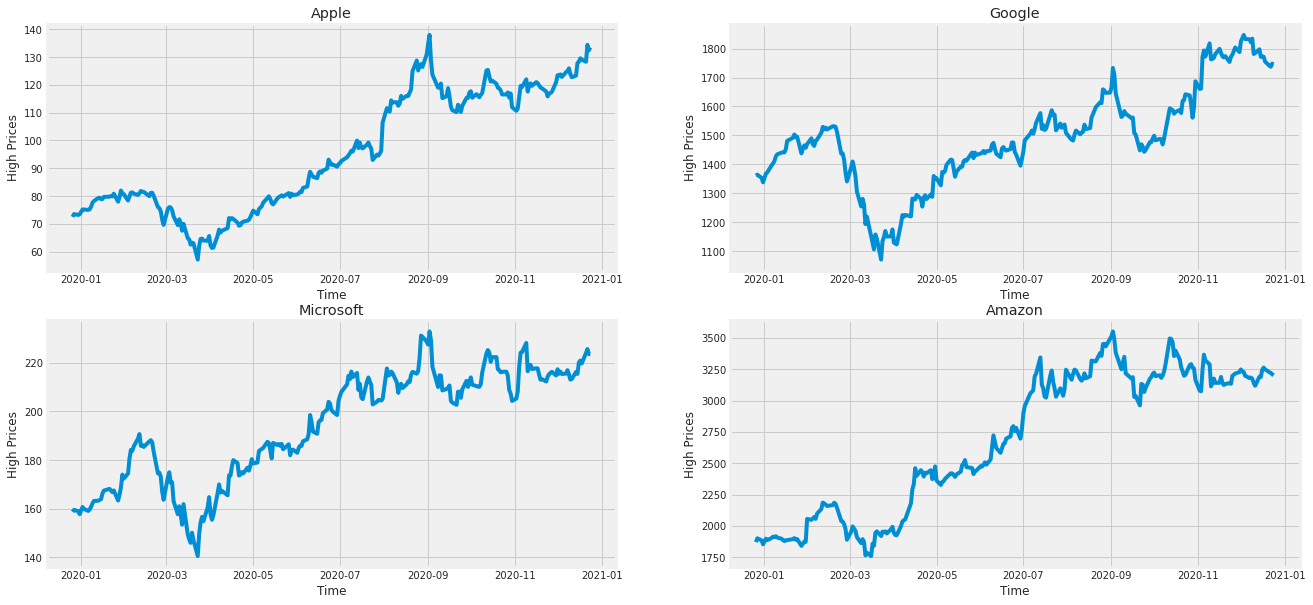

In [ ]:
# Plotting the daily High Price

plt.figure(figsize=(20,10))
for stock, i in zip(stock_list.keys(), range(4)):
  plt.subplot(2,2, i+1)
  plt.plot(stock_list[stock]['High'])
  plt.xlabel('Time')
  plt.ylabel('High Prices')
  plt.title(stock_list[stock]['Name'][0])

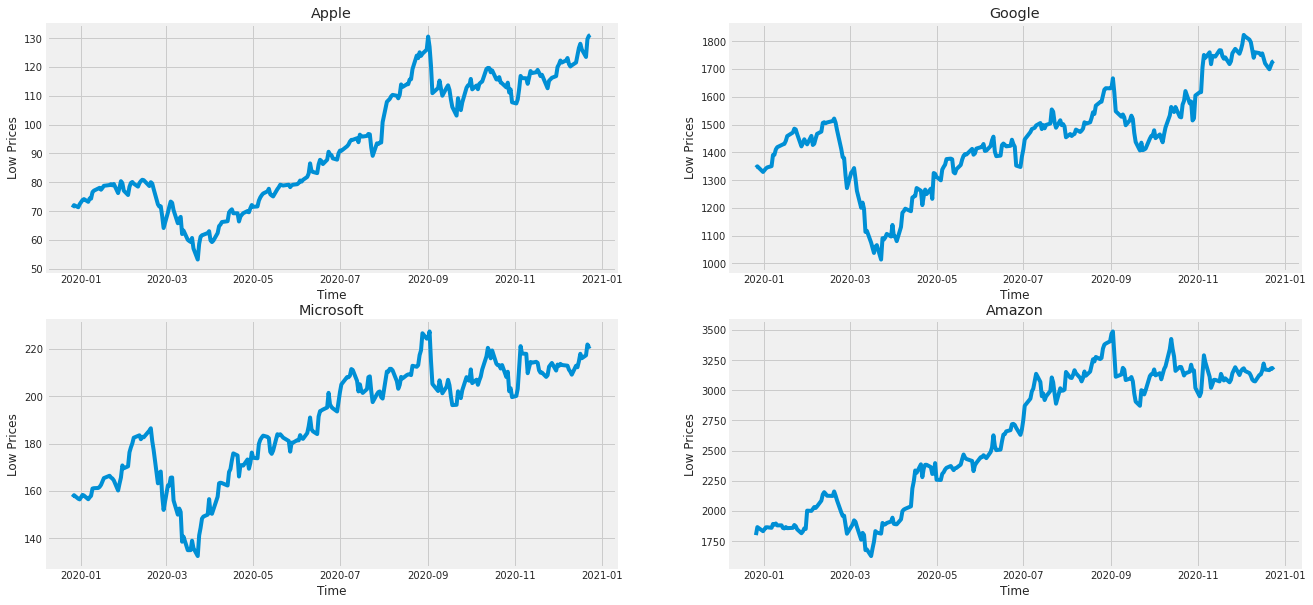

In [ ]:
# Plotting the daily Low Price

plt.figure(figsize=(20,10))
for stock, i in zip(stock_list.keys(), range(4)):
  plt.subplot(2,2, i+1)
  plt.plot(stock_list[stock]['Low'])
  plt.xlabel('Time')
  plt.ylabel('Low Prices')
  plt.title(stock_list[stock]['Name'][0])

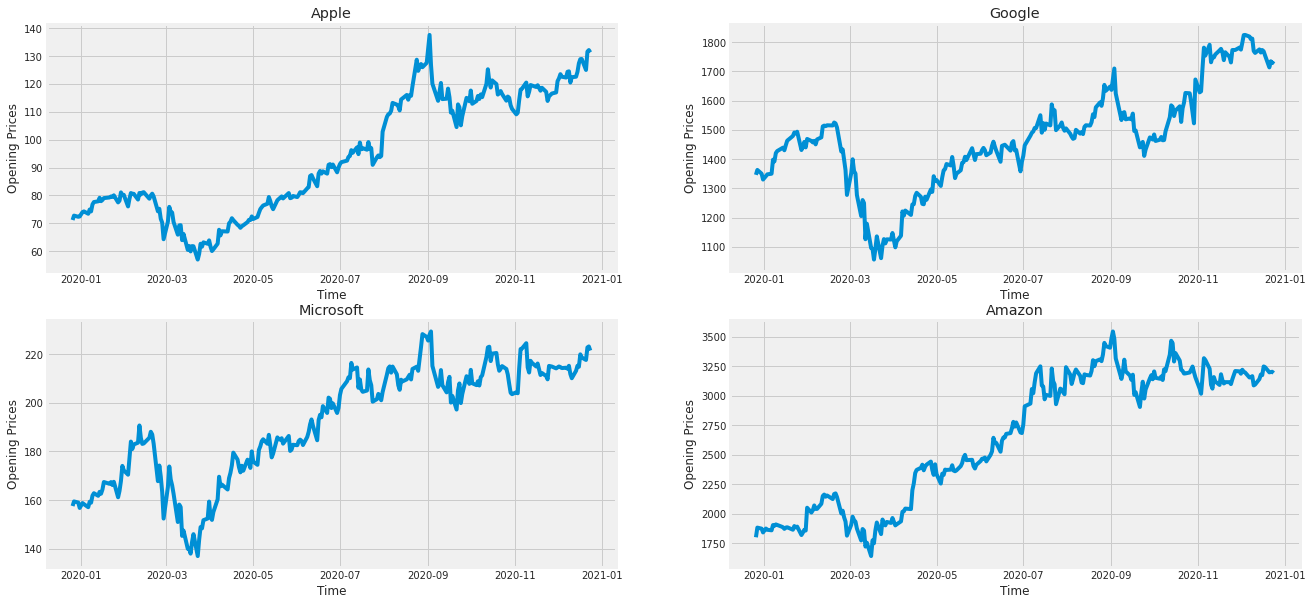

In [ ]:
# Plotting the daily Opening Price

plt.figure(figsize=(20,10))
for stock, i in zip(stock_list.keys(), range(4)):
  plt.subplot(2,2, i+1)
  plt.plot(stock_list[stock]['Open'])
  plt.xlabel('Time')
  plt.ylabel('Opening Prices')
  plt.title(stock_list[stock]['Name'][0])

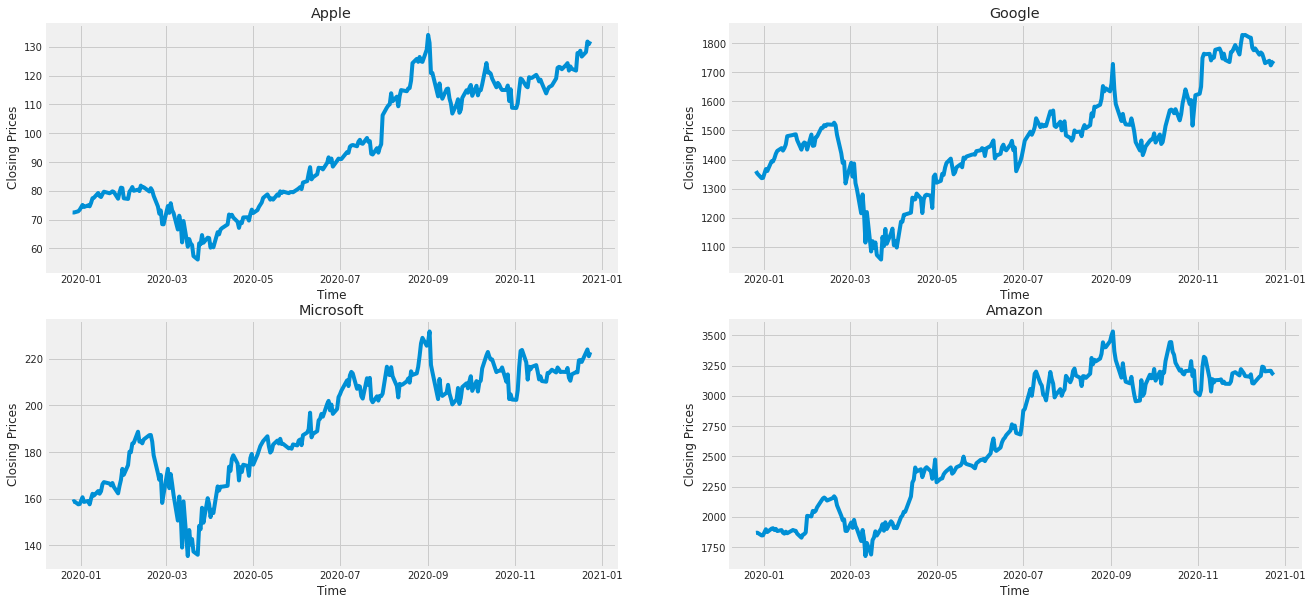

In [ ]:
# Plotting the daily Closing Price

plt.figure(figsize=(20,10))
for stock, i in zip(stock_list.keys(), range(4)):
  plt.subplot(2,2, i+1)
  plt.plot(stock_list[stock]['Close'])
  plt.xlabel('Time')
  plt.ylabel('Closing Prices')
  plt.title(stock_list[stock]['Name'][0])

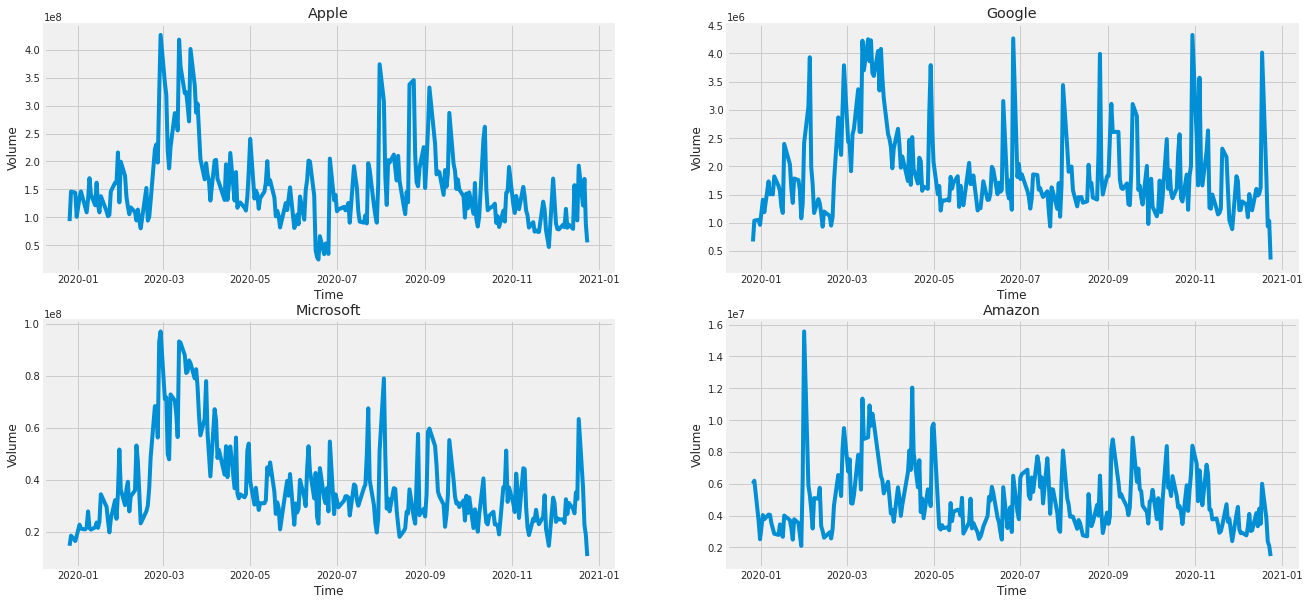

In [ ]:
# Plotting the daily Volume traded
plt.figure(figsize=(20,10))
for stock, i in zip(stock_list.keys(), range(4)):
  plt.subplot(2,2, i+1)
  plt.plot(stock_list[stock]['Volume'])
  plt.xlabel('Time')
  plt.ylabel('Volume')
  plt.title(stock_list[stock]['Name'][0])

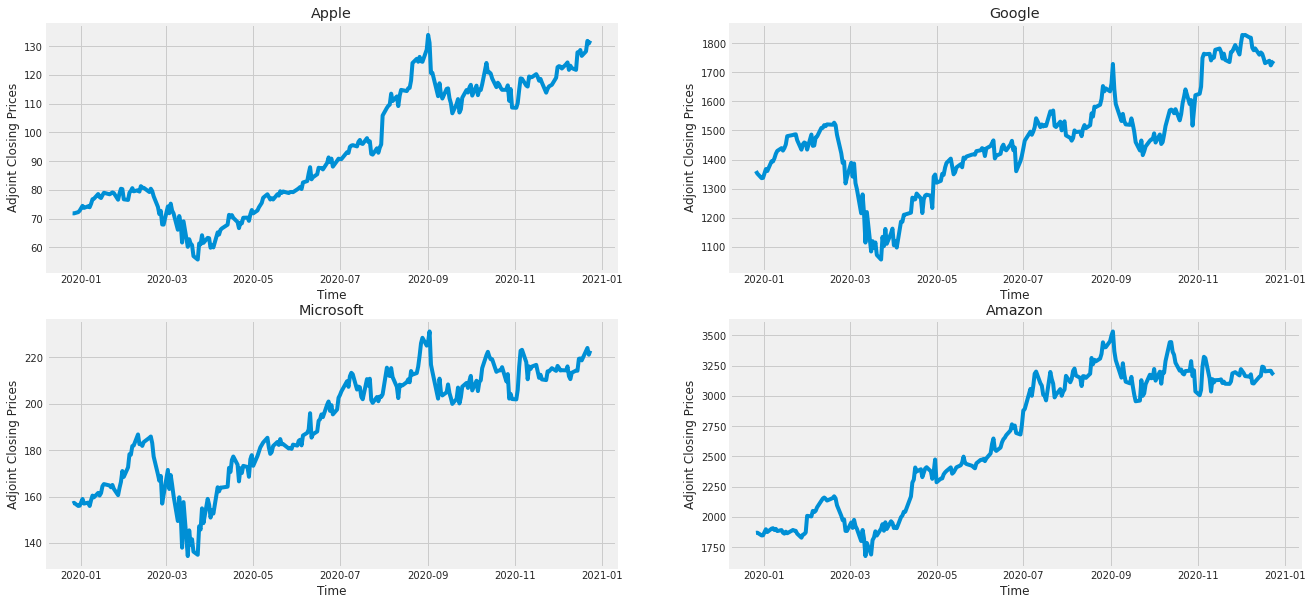

In [ ]:
# Plotting the Adjoint Closing Prices

plt.figure(figsize=(20,10))
for stock, i in zip(stock_list.keys(), range(4)):
  plt.subplot(2,2, i+1)
  plt.plot(stock_list[stock]['Adj Close'])
  plt.xlabel('Time')
  plt.ylabel('Adjoint Closing Prices')
  plt.title(stock_list[stock]['Name'][0])

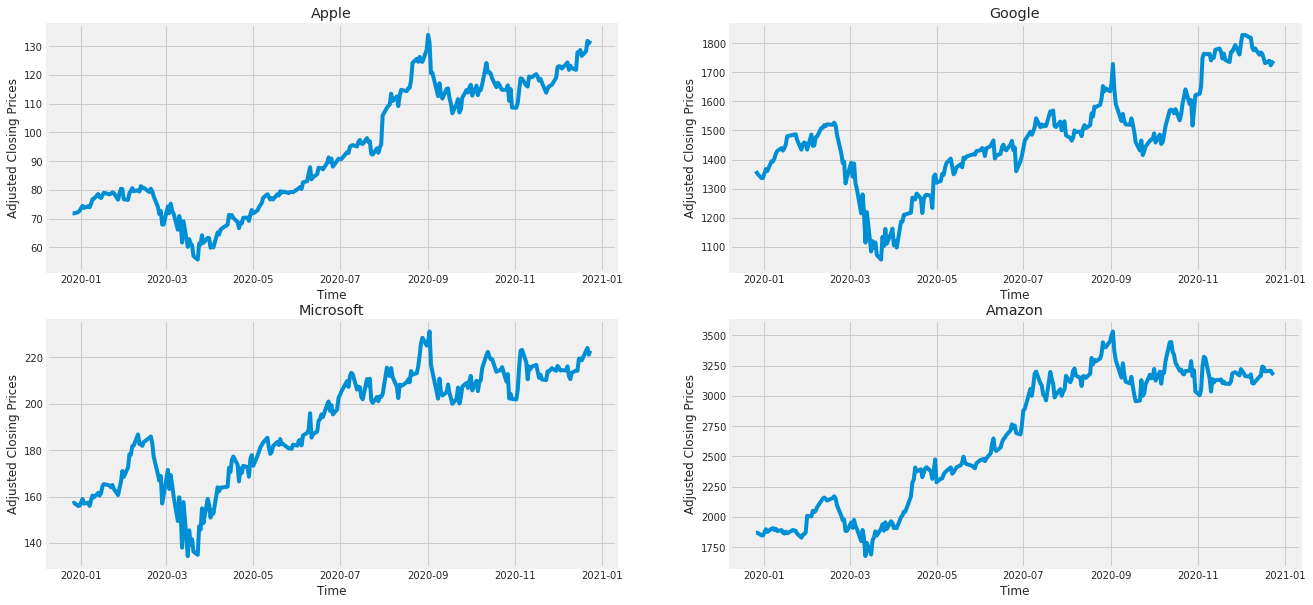

In [ ]:
# Plotting the Adjoint Closing Prices

plt.figure(figsize=(20,10))
for stock, i in zip(stock_list.keys(), range(4)):
  plt.subplot(2,2, i+1)
  plt.plot(stock_list[stock]['Adj Close'])
  plt.xlabel('Time')
  plt.ylabel('Adjusted Closing Prices')
  plt.title(stock_list[stock]['Name'][0])

## Obtaining the Moving Average of the Adoint Closing Price of the Stock

In [ ]:
# Calculating the Moving Average

moving_average = [5, 20, 40]

for stock in stock_list.keys():
  for i in moving_average:
    name = 'MA ' +str(i)
    stock_list[stock][name] = stock_list[stock]['Adj Close'].rolling(i).mean()

# Updated List
stock_list['MSFT'].describe()

,High,Low,Open,Close,Volume,Adj Close,MA 5,MA 20,MA 40
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000,249.000000,234.000000,214.000000
mean,194.410712,189.353913,191.863123,191.997312,3.762697e+07,191.026765,191.049395,191.249926,191.273829
std,22.765530,23.295539,23.150599,23.073361,1.694764e+07,23.443341,22.971748,21.752584,20.674611
min,140.570007,132.520004,137.009995,135.419998,1.055060e+07,134.366470,139.397021,147.925149,157.377532
25%,174.559998,170.399994,173.500000,172.789993,2.617760e+07,171.445724,171.997391,173.568767,169.643983
50%,202.710007,196.250000,198.589996,200.389999,3.279080e+07,199.563873,198.397739,200.752617,198.247248
75%,214.669998,209.250000,211.770004,211.800003,4.387230e+07,211.414124,210.890753,212.274987,210.873795
max,232.860001,227.350006,229.270004,231.649994,9.707360e+07,231.045105,227.392676,216.564000,214.603630


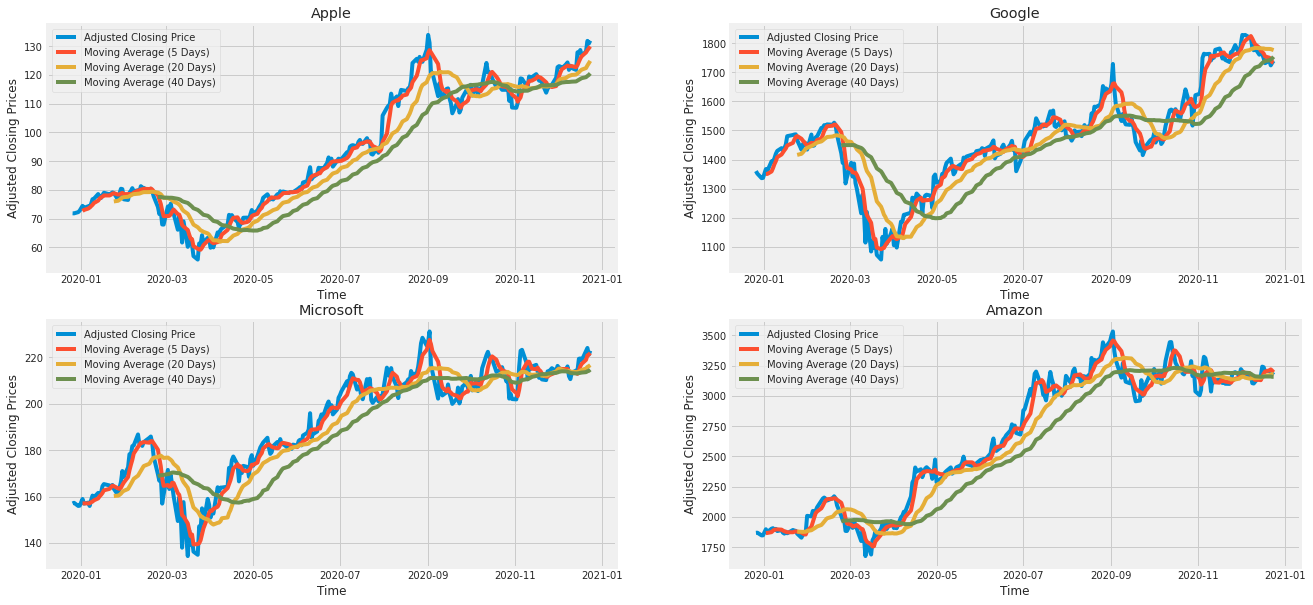

In [ ]:
# Plotting the Moving Average 

plt.figure(figsize=(20,10))
for stock, i in zip(stock_list.keys(), range(4)):
  plt.subplot(2,2, i+1)
  plt.plot(stock_list[stock]['Adj Close'], 
           label='Adjusted Closing Price')
  plt.plot(stock_list[stock]['MA 5'], label='Moving Average (5 Days)')
  plt.plot(stock_list[stock]['MA 20'], label='Moving Average (20 Days)')
  plt.plot(stock_list[stock]['MA 40'], label='Moving Average (40 Days)')
  plt.legend(loc="upper left")
  plt.xlabel('Time')
  plt.ylabel('Adjusted Closing Prices')
  plt.title(stock_list[stock]['Name'][0])


## Percentage Change in the Daily Adjusted Closing Price

In [ ]:
# Obataining the Daily Percentage Change

for stock in stock_list.keys():
  stock_list[stock]['Percentage Change'] = stock_list[stock]['Adj Close'].pct_change()

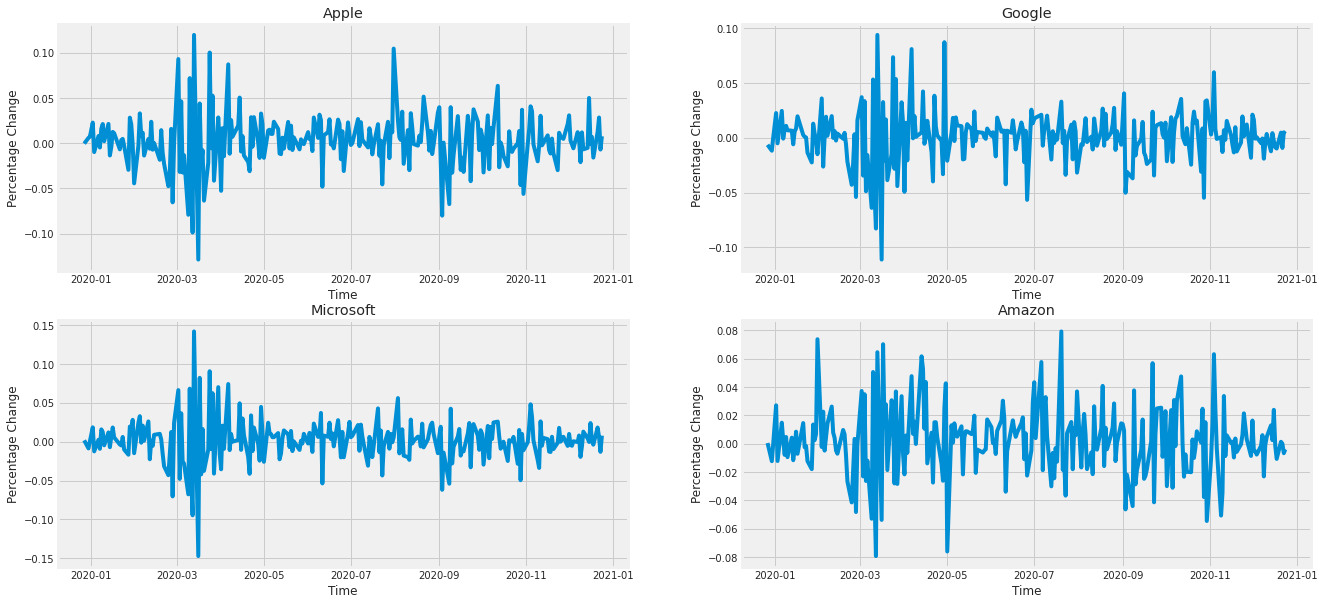

In [ ]:
# Plotting the Daily Percentage Change

plt.figure(figsize=(20,10))
for stock, i in zip(stock_list.keys(), range(4)):
  plt.subplot(2,2, i+1)
  plt.plot(stock_list[stock]['Percentage Change'])
  plt.xlabel('Time')
  plt.ylabel('Percentage Change')
  plt.title(stock_list[stock]['Name'][0])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

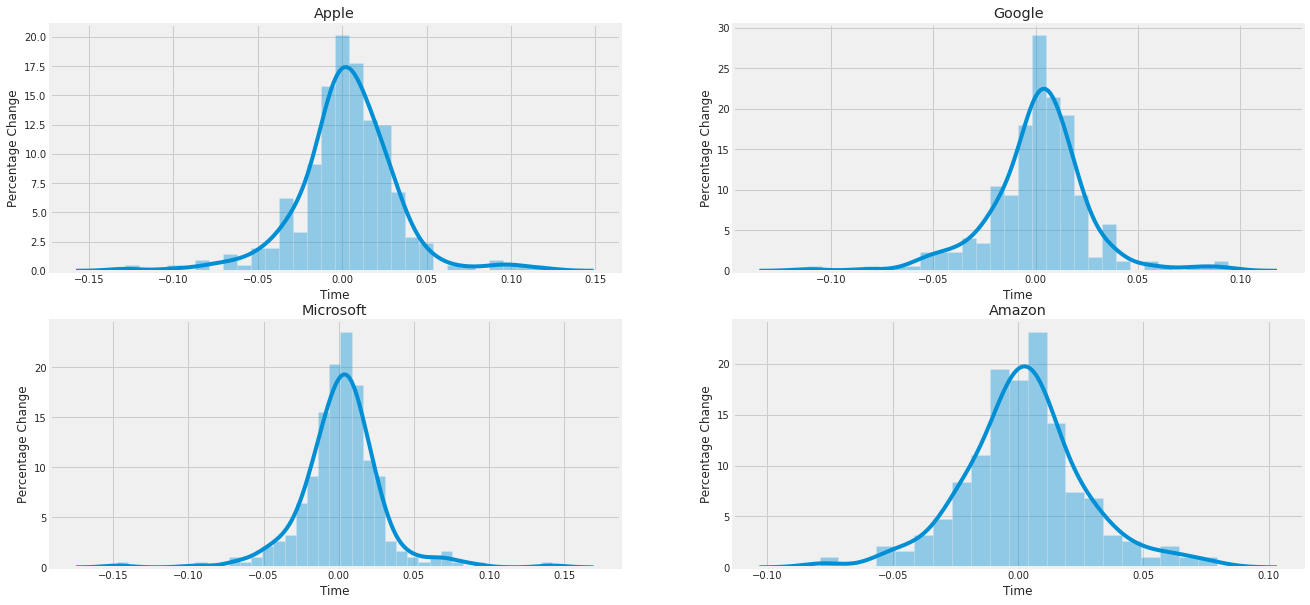

In [ ]:
# Plotting the Percentage Change Distribution

plt.figure(figsize=(20,10))
for stock, i in zip(stock_list.keys(), range(4)):
  plt.subplot(2,2, i+1)
  sns.distplot(stock_list[stock]['Percentage Change'], hist=True, kde=True)
  plt.xlabel('Time')
  plt.ylabel('Percentage Change')
  plt.title(stock_list[stock]['Name'][0])

## Obtaining the Correlation between the Adjusted Closing Prices of Different Stocks

In [ ]:
# Creating a new DataFrame that has all the Adjusted Closing Prices

cldf = pd.DataFrame()

for stock in stock_list.keys():
    cldf[stock_list[stock]['Name'][0]] = stock_list[stock]['Adj Close']

cldf.head(5)

,Apple,Google,Microsoft,Amazon
Date,,,,
2019-12-26,71.856941,1360.400024,157.006729,1868.770020
2019-12-27,71.829674,1351.890015,157.293686,1869.800049
2019-12-30,72.255997,1336.140015,155.938049,1846.890015
2019-12-31,72.783936,1337.020020,156.046890,1847.839966
2020-01-02,74.444603,1367.369995,158.936279,1898.010010


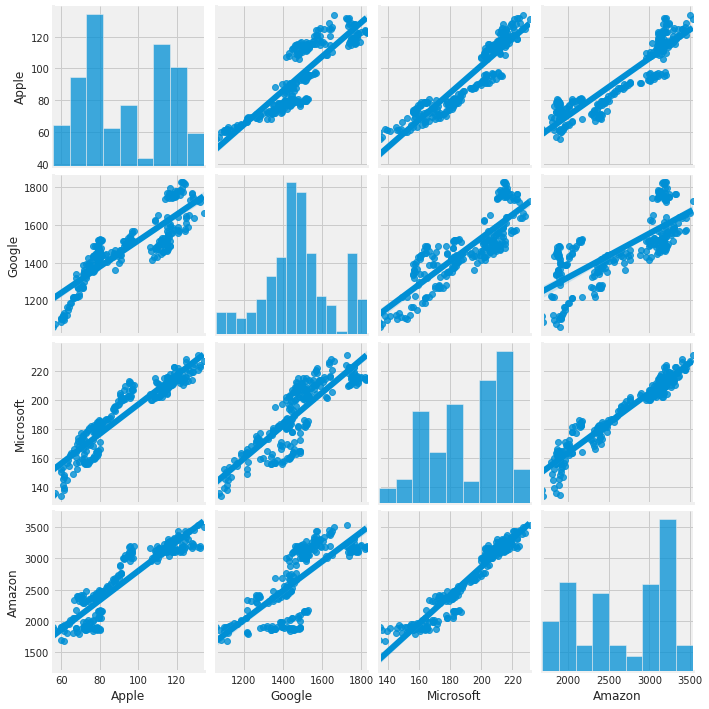

In [ ]:
# Getting the correlation between different stocks as a scatter plot

sns.pairplot(cldf, kind='reg')

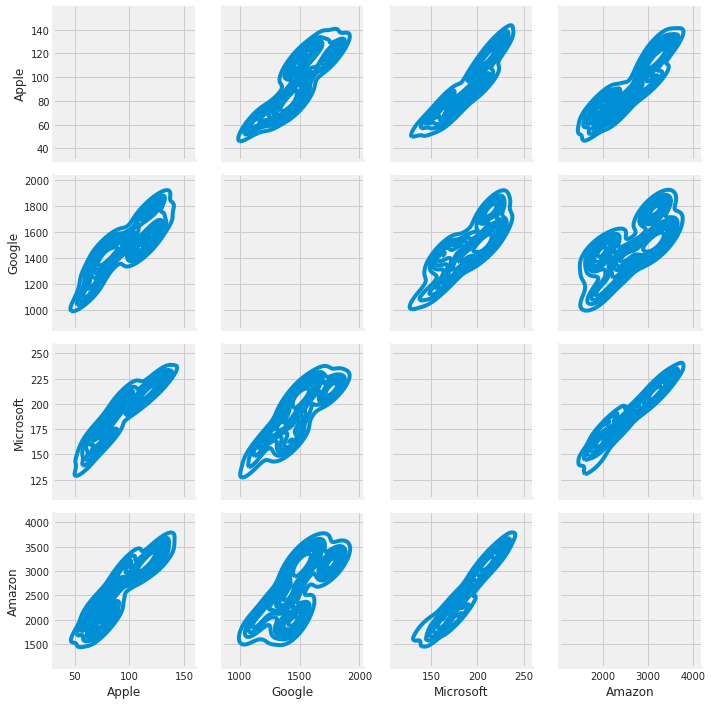

In [ ]:
# Getting the correlation between different stocks as a distribution
pair_plot = sns.PairGrid(cldf.dropna())
pair_plot.map_upper(sns.kdeplot)
pair_plot.map_diag(plt.hist, bins = 20)
pair_plot.map_lower(sns.kdeplot)

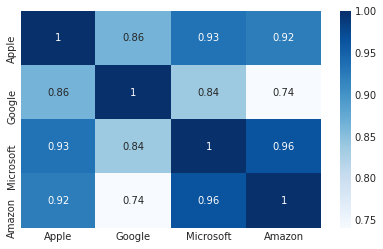

In [ ]:
# Plotting a Correlation Matrix

cor = cldf.corr()
sns.heatmap(cor, annot=True, cmap='Blues')

## Calculating the Risk vs Reward for each stock

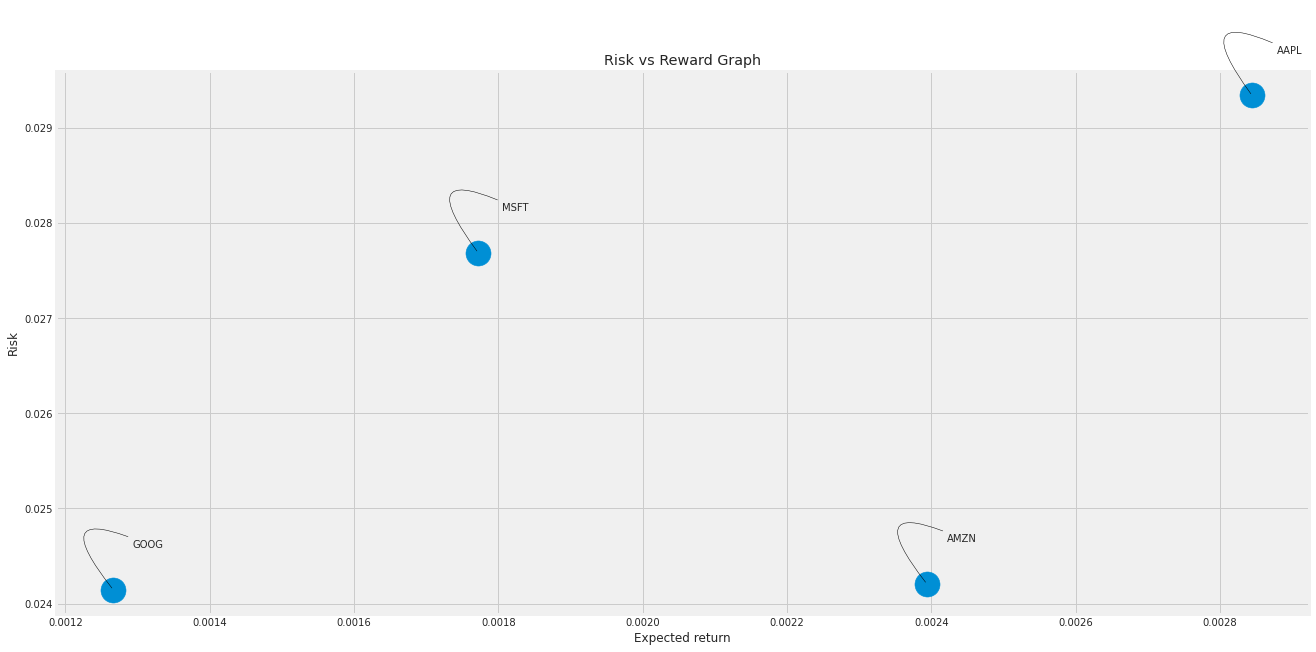

In [ ]:
# Getting all the closing prices into one datframe
closing_prices = DataReader(list(stock_list.keys()), 'yahoo', start_time, end_time)['Adj Close']

# Getting the risk vs reward 
returns_vs_risk = closing_prices.pct_change().dropna()


area = np.pi*200

plt.figure(figsize=(20, 10))
plt.scatter(returns_vs_risk.mean(), returns_vs_risk.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Risk vs Reward Graph')

for label, x, y in zip(returns_vs_risk.columns, returns_vs_risk.mean(), returns_vs_risk.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='top', 
                 arrowprops=dict(arrowstyle='-', color='black', connectionstyle='arc3, rad=2'))
    


## Predicting the Stock Price for Google

In [ ]:
# Getting the stock price data
google_stock_price = DataReader('GOOG', data_source='yahoo', start='2012-01-01', end=datetime.now())
google_stock_price

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,332.827484,324.966949,325.250885,331.462585,7380500.0,331.462585
2012-01-04,333.873566,329.076538,331.273315,332.892242,5749400.0,332.892242
2012-01-05,330.745300,326.889740,329.828735,328.274536,6590300.0,328.274536
2012-01-06,328.767700,323.681763,328.344299,323.796326,5405900.0,323.796326
2012-01-09,322.291962,309.455078,322.042908,310.067780,11688800.0,310.067780
...,...,...,...,...,...,...
2020-12-18,1755.109985,1720.219971,1754.180054,1731.010010,4016400.0,1731.010010
2020-12-21,1740.849976,1699.000000,1713.510010,1739.369995,1828400.0,1739.369995
2020-12-22,1737.405029,1712.574951,1734.430054,1723.500000,936700.0,1723.500000


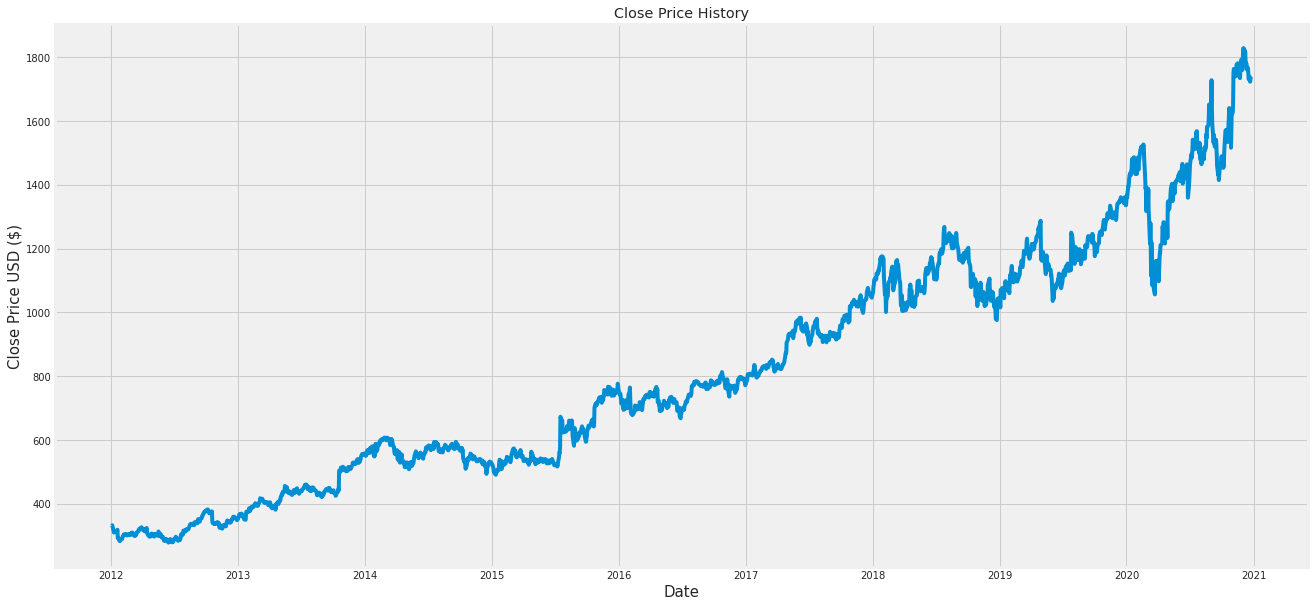

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(google_stock_price['Close'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price USD ($)', fontsize=15)
plt.show()

In [ ]:
# Converting the data into a NumPy Array
data = google_stock_price.filter(['Close'])
google_data_set = google_stock_price.filter(['Close']).values
print(int(np.ceil( len(google_data_set) * .8 )))

# Scaling the Data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
google_scaled_data = scaler.fit_transform(google_data_set)
print(np.size(google_scaled_data))

training_data_len = int(np.ceil( len(google_data_set) * .8 ))
print(training_data_len)

1809
2261
1809


In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = google_scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

    
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
# Building the Model
model = Sequential(name='stock_price_predictor')
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

# Compiling the Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae', 'mape'])

# Model Summary
model.summary()

Model: "stock_price_predictor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 60, 128)           66560     
_________________________________________________________________
lstm_52 (LSTM)               (None, 60, 128)           131584    
_________________________________________________________________
lstm_53 (LSTM)               (None, 60, 128)           131584    
_________________________________________________________________
lstm_54 (LSTM)               (None, 60, 64)            49408     
_________________________________________________________________
lstm_55 (LSTM)               (None, 60, 64)            33024     
_________________________________________________________________
lstm_56 (LSTM)               (None, 60, 64)            33024     
_________________________________________________________________
lstm_57 (LSTM)               (None, 64)      

In [ ]:
# Training the Model
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
55/55 [==============================] - 29s 335ms/step - loss: 0.0298 - mse: 0.0298 - mae: 0.1240 - mape: 105968.4674
Epoch 2/30
55/55 [==============================] - 19s 337ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0245 - mape: 16046.5924
Epoch 3/30
55/55 [==============================] - 19s 338ms/step - loss: 7.1107e-04 - mse: 7.1107e-04 - mae: 0.0205 - mape: 23872.8902
Epoch 4/30
55/55 [==============================] - 19s 337ms/step - loss: 7.2591e-04 - mse: 7.2591e-04 - mae: 0.0207 - mape: 10435.8758
Epoch 5/30
55/55 [==============================] - 19s 339ms/step - loss: 6.8924e-04 - mse: 6.8924e-04 - mae: 0.0196 - mape: 33926.5118
Epoch 6/30
55/55 [==============================] - 19s 339ms/step - loss: 6.6122e-04 - mse: 6.6122e-04 - mae: 0.0196 - mape: 4387.0493
Epoch 7/30
55/55 [==============================] - 19s 338ms/step - loss: 7.5480e-04 - mse: 7.5480e-04 - mae: 0.0210 - mape: 25762.1582
Epoch 8/30
55/55 [==============================] - 19s 3

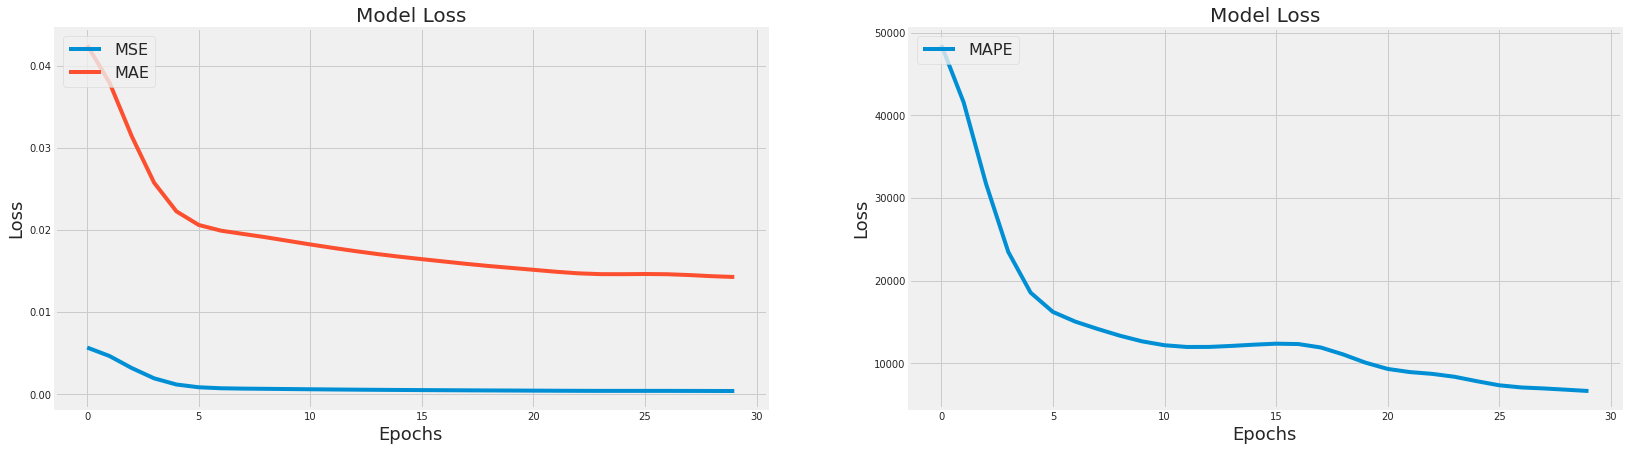

In [ ]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (25,7)

plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['loss'])), gaussian_filter1d(history.history['loss'], sigma=2))
plt.plot(gaussian_filter1d(history.history['mae'], sigma=2))
plt.title('Model Loss', fontsize= 20)
plt.ylabel('Loss', fontsize= 18)
plt.xlabel('Epochs', fontsize= 18)
plt.legend(['MSE','MAE'], loc='upper left', fontsize = 16)

plt.subplot(1, 2, 2)
plt.plot(range(len(history.history['mape'])), gaussian_filter1d(history.history['mape'], sigma=2))
plt.title('Model Loss', fontsize= 20)
plt.ylabel('Loss', fontsize= 18)
plt.xlabel('Epochs', fontsize= 18)
plt.legend(['MAPE'], loc='upper left', fontsize = 16)

In [ ]:
# Creating the test daset
test_data = google_scaled_data[training_data_len - 60: , :]

# Creating the x_test and y_test dataset
x_test = []
y_test = google_data_set[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Getting the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Getting the RMSE error
err = np.sqrt(np.mean(((predictions - y_test) ** 2)))
err

161.70681417596046

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


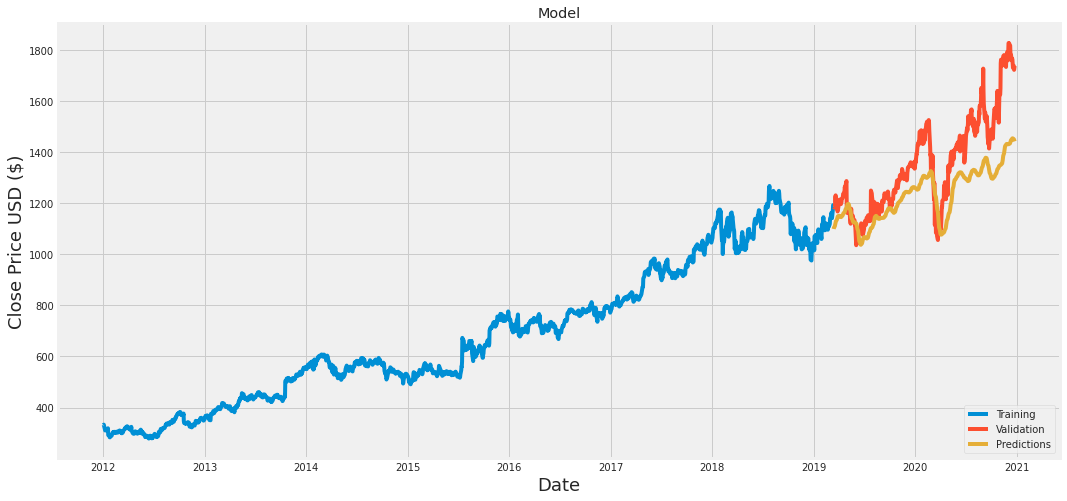

In [ ]:
# Plotting the Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualizing the Data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training', 'Validation', 'Predictions'], loc='lower right')
plt.show()